In [53]:
%qtconsole

In [2]:
from IPython.display import HTML

# Introduction to Scientific Programming in Python

## Lecture 3: Python Modules and Packages, NumPy Arrays, and Plotting with Matplotlib

# Modules and Packages

If someone saves a text file with Python code in it and gives it the ".py" file extension, you can run that file in your own session using the **import** statement. If that file contained functions or new classes, then we get to use them!
  - A **Module** is one Python file.
  - A **Package** is a collection of Python files.
  


## The "Import" Statement, Dot Notation, and Namespaces
To keep from overwriting other functions that may have the same name, Python lets us use the Dot to tell it which packages' function we want to use.  What comes before the dot (or whether a dot is even needed) is referred to as an object's **Namespace**.

In [3]:
import math
import numpy
print(math.sqrt)
print(numpy.sqrt)

<built-in function sqrt>
<ufunc 'sqrt'>


## "From" lets you bring modules and functions into other namespaces. 

In [4]:
from math import sqrt
from numpy import sqrt
sqrt

<ufunc 'sqrt'>

## The "as" operater lets you assign a different variable name in the import statement

In [5]:
import math as m
import numpy as np

## Even Packages are objects; They can be renamed the same as anything else once imported.

In [6]:
the_math_package = math
print(the_math_package)

<module 'math' (built-in)>


## Import Submodules with the Dot notation and "as"

In [7]:
import numpy.linalg as linalg

## Script vs Package
If you have code that you want to run **only** if being called as a script (not being imported as a package): use the following code snippet:

In [8]:
if __name__ == '__main__':
    print('This code runs only in scripts and interactive sessions.')

This code runs only in scripts and interactive sessions.


# The NumPy Package

NumPy is a package for creating, transforming, and calculation with **Arrays** and **Matrices**.  It is the most essential package of the entire Python scientific library. 

The more familiar you are with NumPy, the more effective you will be during data analysis.  So bear with me as I share with you...

## NumPy Array Objects

To construct a **numpy.array**, you should give it an **Iterable**.  It will guess what data type you want, but this can be set with the **dtype** **keyword argument**:

In [9]:
import numpy as np
a_array = np.array([1, 2, 3, 4])
a_array

array([1, 2, 3, 4])

In [10]:
a_float_array = np.array([1, 2, 3, 4], dtype=float)
a_float_array

array([ 1.,  2.,  3.,  4.])

## Array Arithmetic: Now Easy!

By default, all operations are performed **Element-Wise**

In [11]:
data = np.array(range(10), dtype=float)
data

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [12]:
data * 5

array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.])

In [13]:
data * data

array([  0.,   1.,   4.,   9.,  16.,  25.,  36.,  49.,  64.,  81.])

## Array Arithmetic: Now Fast (on large datasets)!

In [14]:
data = np.array(range(200000))
%timeit [el ** 2 for el in data]

10 loops, best of 3: 35.1 ms per loop


In [15]:
%timeit data ** 2

1000 loops, best of 3: 226 µs per loop


## Arrays Can Be Indexed and Sliced, Just like Tuples and Lists

In [88]:
data = np.array(range(10), dtype=float)
data

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [89]:
data[3]

3.0

In [90]:
data[:5]

array([ 0.,  1.,  2.,  3.,  4.])

## Logical Indexing: Using Bool arrays to filter an array

In [92]:
data[data > 4]

array([ 5.,  6.,  7.,  8.,  9.])

## Fancy Indexing: Indexing with a list of indices

In [93]:
data[[3, 5, 9]]

array([ 3.,  5.,  9.])

## NumPy comes with Lots of useful math functions!

In [19]:
np.sin(data)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [20]:
HTML('<iFrame src="http://docs.scipy.org/doc/numpy/reference/routines.math.html" width=900 height=300></iFrame>')

## Some Array-Creation Shortcut Functions

In [21]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
np.linspace(3, 10, 5)

array([  3.  ,   4.75,   6.5 ,   8.25,  10.  ])

In [94]:
np.zeros(4); np.ones(4)
np.zeros_like(data); np.ones_like(data)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

# Matlab - Python - R Equivalents

For a fairly comprehensive lists of equivalents between languages, see:
http://mathesaurus.sourceforge.net/matlab-python-xref.pdf

In [25]:
HTML('<iFrame src="http://mathesaurus.sourceforge.net/matlab-python-xref.pdf" width=900 height=400></iFrame>')

# Plotting in Matplotlib

Matplotlib is the main plotting package in Python.  Its most important module is the **pyplot** module.  As such, you will almost always see it imported as:

In [26]:
import matplotlib.pyplot as plt

## To make plots visible in your Jupyter Notebook: 

In [27]:
%matplotlib inline

## Plot and Scatter

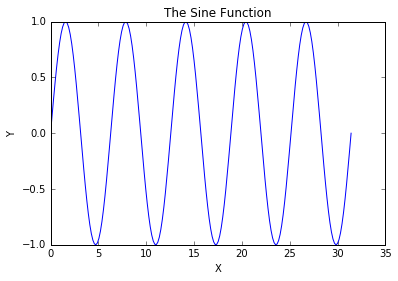

In [28]:
x = np.linspace(0, 10*np.pi, 200)
sinx = np.sin(x)

plt.plot(x, sinx)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('The Sine Function')

## Matplotlib Figures are composed of many sub-objects...

  - **Figures** are the actual window that the graphics are inside.
  - **Axes** is what we usually think of as a figure.  It contains the title, labels, lines, markers, tick marks, etc.

To modify your figures, you will inevitably need to figure out which object needs to be modified.
  

## Making Subplots

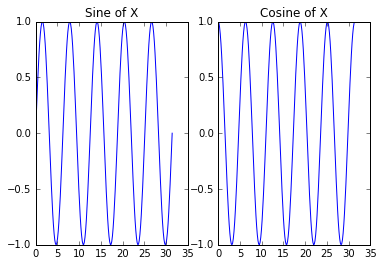

In [29]:
cosx = np.cos(x)

fig = plt.figure(1)

ax = plt.subplot(1, 2, 1)
ax.plot(x, sinx)
plt.title('Sine of X')

ax = plt.subplot(1, 2, 2)
ax.plot(x, cosx)
plt.title('Cosine of X')

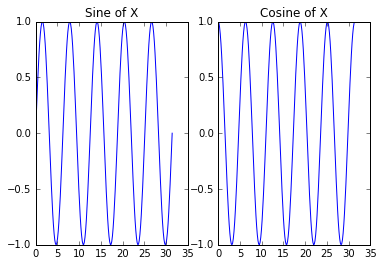

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=2)
for ax, data, title in zip(axes, [sinx, cosx], ['Sine', 'Cosine']):
    ax.plot(x, data)
    ax.set_title('{} of X'.format(title))


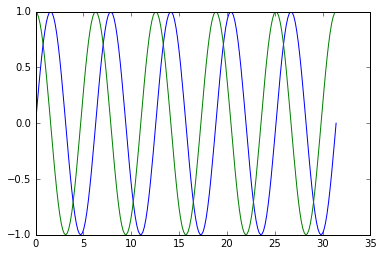

In [31]:
fig, ax = plt.subplots()
ax.plot(x, sinx)
ax.plot(x, cosx)

### Note: While shorter, this is still kind of ugly code. We will solve this problem in later sessions with Pandas and Seaborn

## Gallery of PyPlot Plotting Functions

In [32]:
HTML('<iFrame src="http://matplotlib.org/gallery.html" height=500 width=900></iFrame>')

# PyPlot Tutorial

In [33]:
HTML('<iFrame src="http://matplotlib.org/users/pyplot_tutorial.html" height=400 width=900></iFrame>')

## Matplotlib Styles: Templates for making your plot look nice!
**Caution:** The style implementation assumes that you are starting with default, so modifying it multiple times may create a weird hybrid-style.  Reset the Python Kernel to confirm that it looks right!

Alternatively, you can use the following code snippet:

In [34]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [37]:
print(plt.style.available[:10])

['seaborn-dark', 'seaborn-whitegrid', 'seaborn-muted', 'fivethirtyeight', 'seaborn-deep', 'seaborn-talk', 'seaborn-notebook', 'seaborn-bright', 'classic', 'seaborn-pastel']


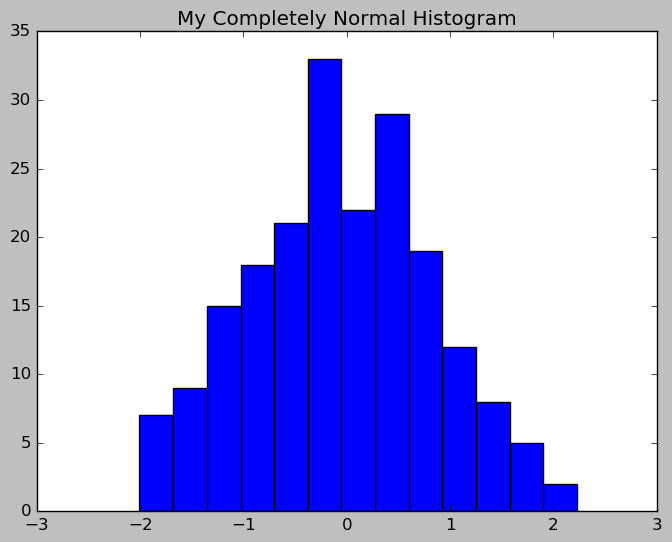

In [86]:
random_data = np.random.randn(200)

mpl.rcParams.update(mpl.rcParamsDefault)
# plt.style.use('ggplot')
plt.hist(random_data, bins=13)
plt.title('My Completely Normal Histogram')

# Questions and Discussion